In [182]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rng

In [183]:
def population(N, M, value=1):
    lattice = (value, (N,M))
    return np.full((N, M), value)

In [184]:
def plotpop(population, left=0, right=0, bottom=0, top=0): #add value to axes
    fig, ax = plt.subplots()
    im = ax.imshow(population, cmap = 'ocean', aspect = 'equal')
    return im

A normal population is going to be 1s, immunized will be 0s, infected will be -1s

In [185]:
def randomperson(population):
    #make one variable x the width of the lattice: x = np.shape(lattice)[0]
    #make one variable y the height of the lattice: y = np.shape(lattice)[1]
    #rn_x is a random integer from 0 to x: rn_x = rng.randint(0,x)
    #rn_y is a random integer from 0 to y: rn_y = rng.randint(0,y)
    #define (rn_x, rn_y) in lattice: particle = lattice[rn_x, rn_y]
    x = np.shape(population)[0]
    y = np.shape(population)[1]
    rn_x = rng.randint(0,x)
    rn_y = rng.randint(0,y)
    person = (rn_x, rn_y)
    return person

In [186]:
def immunize(population, person):
    new_val = 0
    population[person] = new_val
    return population

In [187]:
def percimmune(perc, population):
    N = np.shape(population)[0]
    M = np.shape(population)[1]
    popdim = N * M
    numimmune = int(perc * popdim)
    i = 0
    while i < numimmune:
        r = randomperson(population)
        while population[r] == 0:
            r = randomperson(population)
        population = immunize(population, r)
        i += 1
    return population

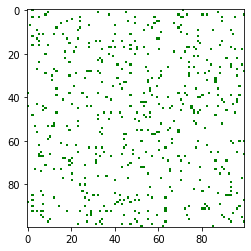

In [188]:
p = population(100,100)
newp = percimmune(.05, p)
plotpop(newp)

In [189]:
def copypopulation(population):
    lattice = population
    return lattice

In [190]:
def infect(population, person):
    val = population[person]
    new_val = ((val**2) * -1)    #if val is 0, this will return 0; if it is either 1 or -1, it will return -1
    newpop = copypopulation(population)
    newpop[person] = new_val
    return newpop

In [359]:
def infectneighbors(pop):
    
    bound_x = np.shape(pop)[0] - 1
    bound_y = np.shape(pop)[1] - 1
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]

    newpop = copypopulation(pop)
    
    infectedcells = []
    
    j = 0
    while j < M:
        i = 0
        while i < N:
            cell = (i, j)
            if pop[cell] == -1:
                infectedcells.append(cell)    
            i += 1
        j += 1

    for (i,j) in infectedcells:
        if i == 0:
            person = (i+1, j)
            newpop = infect(newpop, person)
        elif i == bound_x:
            person = (i-1, j)
            newpop = infect(newpop, person)
        else: #i in between
            person1 = (i-1, j)
            newpop = infect(newpop, person1)
            person2 = i+1, j
            newpop = infect(newpop, person2)
        if j == 0:
            person = (i, j+1)
            newpop = infect(newpop, person)
        elif j == bound_y:
            person = (i, j-1)
            newpop = infect(newpop, person)
        else: #j in between
            person1 = (i, j-1)
            newpop = infect(newpop, person1)
            person2 = (i, j+1)
            newpop = infect(newpop, person2)

    return newpop

In [360]:
def infectradius(pop, radius):
    r = radius + 1
    
    bound_x = np.shape(pop)[0] - 1
    bound_y = np.shape(pop)[1] - 1
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]

    newpop = copypopulation(pop)
    
    infectedcells = []
    j = 0
    while j < M:
        i = 0
        while i < N:
            cell = (i, j)
            if pop[cell] == -1:
                infectedcells.append(cell)    
            i += 1
        j += 1

    for (i,j) in infectedcells:
        if i == 0:
            if j == 0:
                for k in range(r):
                    for l in range(r):
                        person = (i+k, j+l)
                        newpop = infect(newpop, person)
            elif j == bound_y:
                for k in range(r):
                    for l in range(r):
                        person = (i+k, j-l)
                        newpop = infect(newpop, person)
            else: #j in between
                for k in range(r):
                    for l in range(r):
                        person1 = (i+k, j-l)
                        newpop = infect(newpop, person1)
                        person2 = (i+k, j+l)
                        newpop = infect(newpop, person2)
        elif i == bound_x:
            if j == 0:
                for k in range(r):
                    for l in range(r):
                        person = (i-k, j+l)
                        newpop = infect(newpop, person)
            elif j == bound_y:
                for k in range(r):
                    for l in range(r):
                        person = (i-k, j-l)
                        newpop = infect(newpop, person)
            else: #j in between
                for k in range(r):
                    for l in range(r):
                        person1 = (i-k, j-l)
                        newpop = infect(newpop, person1)
                        person2 = (i-k, j+l)
                        newpop = infect(newpop, person2)
        else: #i in between
            if j == 0:
                for k in range(r):
                    for l in range(r):
                        person1 = (i-k, j+l)
                        newpop = infect(newpop, person1)
                        person2 = (i+k, j+l)
                        newpop = infect(newpop, person2)
            elif j == bound_y:
                for k in range(r):
                    for l in range(r):
                        person1 = (i-k, j-l)
                        newpop = infect(newpop, person1)
                        person2 = (i+k, j-l)
                        newpop = infect(newpop, person2)
            else: #j in between
                for k in range(r):
                    for l in range(r):
                        person1 = (i-k, j-l)
                        newpop = infect(newpop, person1)
                        person2 = (i-k, j+l)
                        newpop = infect(newpop, person2)
                        person3 = (i+k, j-l)
                        newpop = infect(newpop, person3)
                        person4 = (i+k, j+l)
                        newpop = infect(newpop, person4)

    return newpop

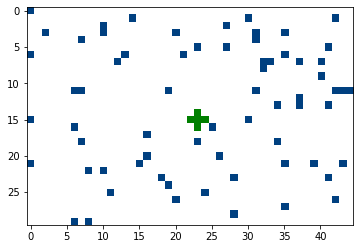

In [193]:
p = population(30,45)
percimmune(.05, p)
newp = infect(p, (15, 23))
infectneighbors(newp)
plotpop(newp)

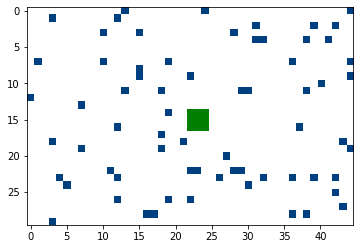

In [194]:
p = population(30,45)
percimmune(.05, p)
newp = infect(p, (15, 23))
infectradius(newp, 1)
plotpop(newp)

In [209]:
def runinfectn(pop, iterations):
    i = 0
    while i < iterations:
        infectneighbors(pop)
        i += 1
    plotpop(pop)

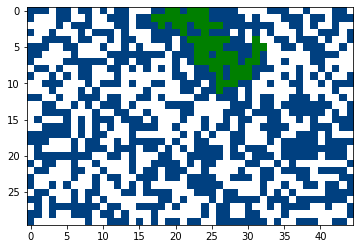

In [239]:
p = population(30,45)
percimmune(.5, p)
newp = infect(p, (0, 23))
runinfectn(newp, 20)

In [197]:
def runinfectr(pop, radius, iterations):
    i = 0
    while i < iterations:
        infectradius(pop, radius)
        i += 1
    plotpop(pop)

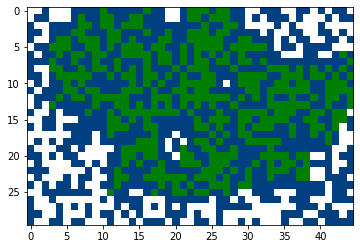

In [208]:
p = population(30,45)
percimmune(.5, p)
newp = infect(p, (0, 23))
runinfectr(newp, 1, 25)

In [386]:
def ifduplicates(array):

    arraycopy = []
    
    for x in array:
        arraycopy.append(x)
    
    newarray = []
    for x in array:
        if x not in newarray:
            newarray.append(x)
    for y in newarray:
        array.remove(y)

    if len(array) == 0:
        return arraycopy, 0
    else:
        return arraycopy, len(array)
    


In [387]:
array = [8, 6, 3, 2, 1, 1, 1]
ifduplicates(array)
#print(array)

([8, 6, 3, 2, 1, 1, 1], 2)

In [431]:
def finditeration(pop, perc):
    its = 0
    healthycells = []
    lenhealthycells = []
    percimmune(perc, pop)
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]
    
    dimpop = N * M
    
    loop = 0
    while loop < 1:
        plotpop(pop)
        j = 0
        while j < M:
            i = 0
            while i < N:
                cell = (i, j)
                if pop[cell] == 1:
                    healthycells.append(cell)
                elif pop[cell] == 0:
                    healthycells.append(cell)
                i += 1
            j += 1
        
        num = len(healthycells)
        lenhealthycells.append(num) 
        print("adding", len(healthycells), "to lenhealthycells")
        print("lenhealthycells =", lenhealthycells)
        
        (lenhealthycells, num) = ifduplicates(lenhealthycells)
        
        if len(healthycells) == dimpop:
            print("infecting patient 0 :P")
            infect(pop, randomperson(pop))
            lenhealthycells.clear()
        else:
            if num > 0: #LOOP ONE
                loop = 1
                print("RAN LOOP ONE // lenhealthycells has duplicates:", "LHC =", lenhealthycells)
            elif len(healthycells) > 0: #LOOP TWO
                print("RAN LOOP TWO // number of healthy cells =", len(healthycells), "infecting more, clearing array,", "lenhealthycells = ", lenhealthycells)
                pop = infectneighbors(pop)
                healthycells.clear()
            else: # LOOP THREE
                loop = 1
                print("RAN LOOP THREE // went else exit")
        its += 1
        print("LOOP STARTING OVER")
    return its

adding 77 to lenhealthycells
lenhealthycells = [77]
infecting patient 0 :P
LOOP STARTING OVER
adding 153 to lenhealthycells
lenhealthycells = [153]
RAN LOOP TWO // number of healthy cells = 153 infecting more, clearing array, lenhealthycells =  [153]
LOOP STARTING OVER
adding 72 to lenhealthycells
lenhealthycells = [153, 72]
RAN LOOP TWO // number of healthy cells = 72 infecting more, clearing array, lenhealthycells =  [153, 72]
LOOP STARTING OVER
adding 65 to lenhealthycells
lenhealthycells = [153, 72, 65]
RAN LOOP TWO // number of healthy cells = 65 infecting more, clearing array, lenhealthycells =  [153, 72, 65]
LOOP STARTING OVER
adding 56 to lenhealthycells
lenhealthycells = [153, 72, 65, 56]
RAN LOOP TWO // number of healthy cells = 56 infecting more, clearing array, lenhealthycells =  [153, 72, 65, 56]
LOOP STARTING OVER
adding 46 to lenhealthycells
lenhealthycells = [153, 72, 65, 56, 46]
RAN LOOP TWO // number of healthy cells = 46 infecting more, clearing array, lenhealthycell

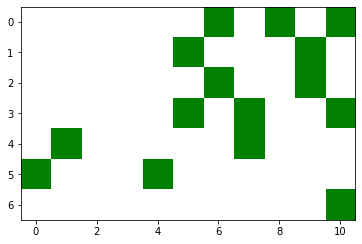

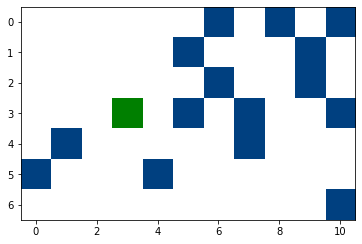

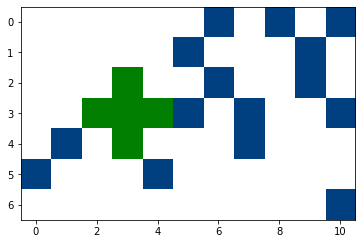

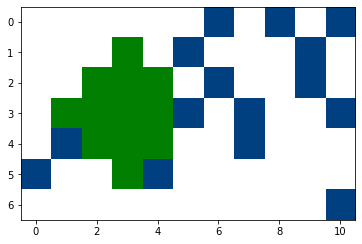

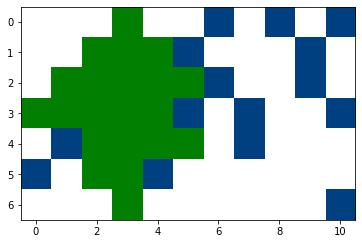

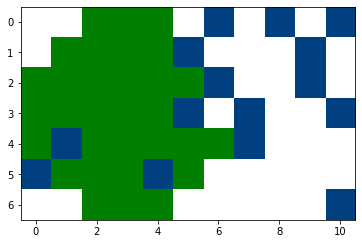

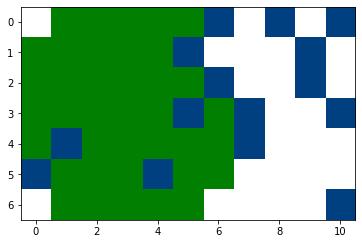

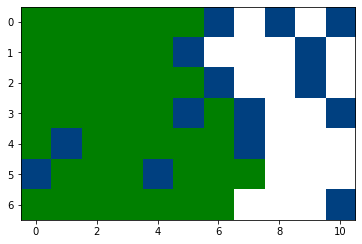

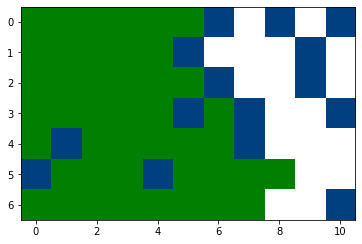

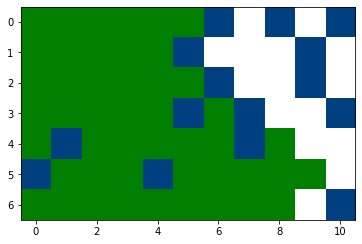

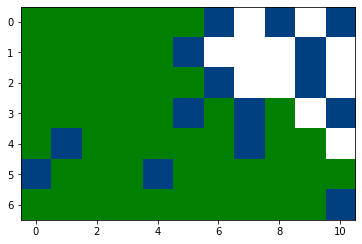

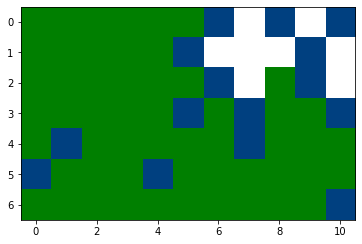

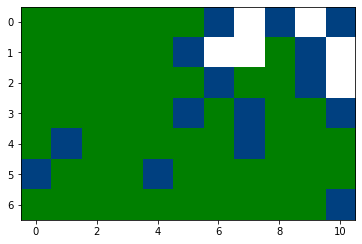

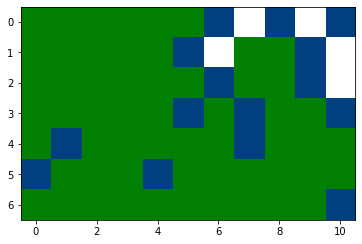

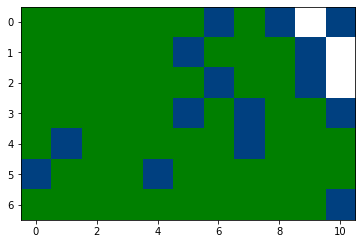

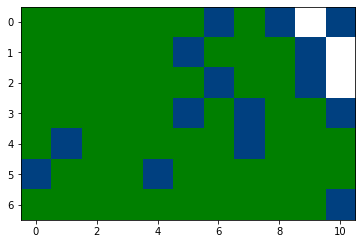

In [435]:
p = population(7,11)
infect(p, (3, 5))
i = finditeration(p, 0.2)
print(i)
#runinfectn(p, i)